### Team SPHS members:
* Surabhi Sarnot (112584690)
* Priyanka Datar (112681258)
* Himanshu Agrawal (112680639)
* Sri Sneha Geetha Retineni (112671507)

General description:
 * This python notebook is for visualizing the results of our analysis for SDG 4 Quality Education Project

In [0]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import numpy as np
import plotly

### Reading dataset

In [0]:
# This data file is the Preprocessed_data.csv created as the output from the 'data_preparation.py' file
data=pd.read_csv("preprocessed_data.csv")

In [0]:
# Selecting 4 counties based on the Similarity Values Analysis (A sample to show the trends in Counties)

# Autauga County AL
data_1 = data[data['STCOUNTYFP']==1001]
# Falls Church County VA
data_2 = data[data['STCOUNTYFP']==51610]
# Alameda County CA
data_3 = data[data['STCOUNTYFP']==6001]
# Suffolk County NY
data_4 = data[data['STCOUNTYFP']==36103]

### Visualization for analyzing the trend of single feature among various counties
* The choice of counties is done using the results from Similarity and Values of EQI.
* The choice of featues is done using the results from Hypothesis testing and choosing feature with different correlations
* Beta(correlation values) for Chosen Attributes are:
* * PCTFLOAN = 0.207755998


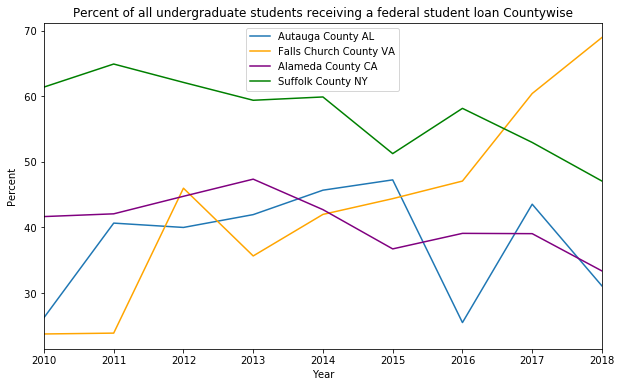

In [0]:
# Multiple-line plot. Colors are showing different counties and how they vary for that feature
# Taking only 1 feature PCFTLOAN= Percent of all undergraduate students receiving a federal student loan

plt.figure(figsize=(10,6))
ax = plt.gca()
data_1.plot(kind='line',x='Year',y='PCTFLOAN',ax=ax, label="Autauga County AL")
data_2.plot(kind='line',x='Year',y='PCTFLOAN', color='orange', ax=ax, label="Falls Church County VA")
data_3.plot(kind='line',x='Year',y='PCTFLOAN', color='purple', ax=ax, label="Alameda County CA")
data_4.plot(kind='line',x='Year',y='PCTFLOAN', color='green', ax=ax, label="Suffolk County NY")

plt.title("Percent of all undergraduate students receiving a federal student loan Countywise")
plt.ylabel("Percent")
plt.legend(loc='upper center')
y_vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}'.format(x * 100) for x in y_vals])

plt.show()

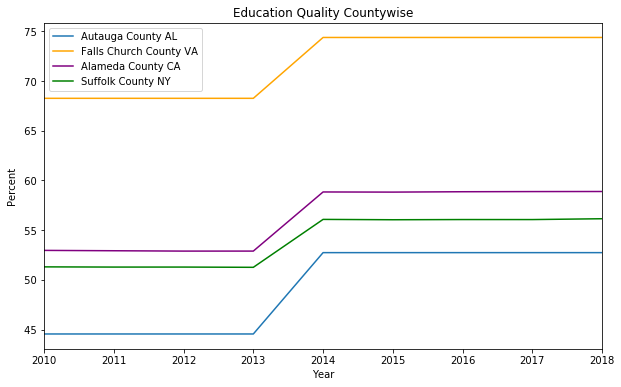

In [0]:
# Analyzing as above for a different feature
plt.figure(figsize=(10,6))
ax = plt.gca()

data_1.plot(kind='line',x='Year',y='EQI',ax=ax, label="Autauga County AL")
data_2.plot(kind='line',x='Year',y='EQI', color='orange', ax=ax, label="Falls Church County VA")
data_3.plot(kind='line',x='Year',y='EQI', color='purple', ax=ax, label="Alameda County CA")
data_4.plot(kind='line',x='Year',y='EQI', color='green', ax=ax, label="Suffolk County NY")

plt.title("Education Quality Countywise")
plt.ylabel("Percent")
plt.legend(loc='upper left')
y_vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}'.format(x * 100) for x in y_vals])

plt.show()

### Visualization for analyzing the trend of multiple(3) feature in a particular county over the years
* The choice of featues is done using the results from Hypothesis testing and choosing feature with different correlations
* The choice of counties is done using the results from Similarity and Contrasting Values of EQI.
* Here selected counties have largest EQI values
* Their Cosine Similarity Value ~(-0.91)
* Beta(correlation values) for Chosen Attributes with EQI are:
* * TUITFTE = 0.328365055
* * POP_ESTIMATE = 0.194768278
* * Unemployment_rate = -0.610623271


In [0]:
# CITE - https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

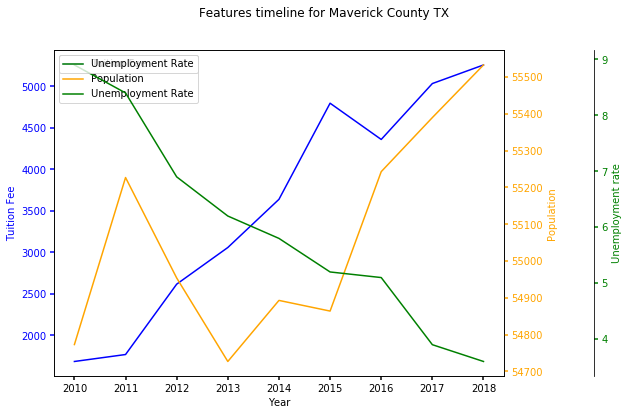

In [0]:
# For Maveric County TX, taking 3 features and plotting them

fig, host = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(data_1['Year'], data_1['TUITFTE'], "b-", label="Tuition Fee")
p2, = par1.plot(data_1['Year'], data_1['POP_ESTIMATE'], "orange", label="Population")
p3, = par2.plot(data_1['Year'], data_1['Unemployment_rate'], "g-", label="Unemployment Rate")

host.set_xlabel("Year")
host.set_ylabel("Tuition Fee")
par1.set_ylabel("Population")
par2.set_ylabel("Unemployment rate")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])
plt.suptitle("Features timeline for Maverick County TX")
plt.legend(loc='upper left')
plt.show()

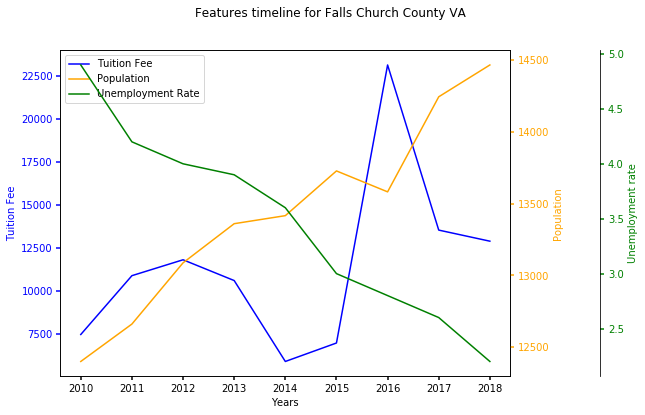

In [0]:
# For Falls Church County VA, taking 3 features and plotting them
fig, host = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(data_2['Year'], data_2['TUITFTE'], "b-", label="Tuition Fee")
p2, = par1.plot(data_2['Year'], data_2['POP_ESTIMATE'], "orange", label="Population")
p3, = par2.plot(data_2['Year'], data_2['Unemployment_rate'], "g-", label="Unemployment Rate")

host.set_xlabel("Years")
host.set_ylabel("Tuition Fee")
par1.set_ylabel("Population")
par2.set_ylabel("Unemployment rate")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])
plt.suptitle("Features timeline for Falls Church County VA")

plt.show()

### Visualizing the Quality Education Index(2018) in Choropleth Map showing values County Wise

In [0]:
# Filtering the data for the Year 2018 to visualize the EQI(Education Quality Index parameter)
df_new = pd.DataFrame(data)
df_new_2018 = df_new[df_new['Year']==2018]
df_new_2018['Fip_str'] = df_new_2018['STCOUNTYFP'].astype('int64')
df_new_2018['Fip_str'] = df_new_2018['Fip_str'].astype(str)

In [0]:
# Choosing the color scale for the map CITE- https://plotly.com/python/county-choropleth/
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

# Dividing the scales
endpts = list(np.linspace(0.4, 0.6, len(colorscale) - 1))

# Fips are 
fips = df_new_2018['Fip_str'].tolist()
values = df_new_2018['EQI'].tolist()


In [8]:
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA Counties by Quality Education Index 2018',
    legend_title='Quality Index Value'
)

fig.layout.template = None
fig.show()